In [8]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib

# import the necessary packages
from small_vgg_net import *
from load_images_cnn import *
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os

In [2]:
x, y = load_data()

973it [00:16, 57.25it/s]
525it [00:12, 40.92it/s]


In [3]:
train_x, test_x, train_y, test_y =  train_test_split(x, y, test_size=0.33, random_state=84)

In [4]:
lb = LabelBinarizer()
train_y = lb.fit_transform(train_y)
test_y = lb.transform(test_y)

In [5]:
# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, 
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")
# initialize our VGG-like Convolutional Neural Network
model = SmallVGGNet.build(width=64, height=64, depth=3, classes=len(lb.classes_))

In [19]:
# initialize our initial learning rate, # of epochs to train for,
# and batch size
INIT_LR = 0.01
EPOCHS = 75
BS = 32
# initialize the model and optimizer (you'll want to use
# binary_crossentropy for 2-class classification)
print("[INFO] training network...")
opt = SGD(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#save the best epoch
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath = r'C:\Users\ferna\Documents\Insper\IC\measuringMacroNutrients\iteration-7',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# train the network
H = model.fit(x=aug.flow(train_x, train_y, batch_size=BS),
              validation_data=(test_x, test_y),
              steps_per_epoch=len(train_x) // BS, 
              epochs=EPOCHS,
              callbacks=[model_checkpoint]
             )

[INFO] training network...
Epoch 1/75
31/31 [==============================] - 22s 661ms/step - loss: 0.9225 - accuracy: 0.6832 - val_loss: 0.5609 - val_accuracy: 0.7818
INFO:tensorflow:Assets written to: C:\Users\ferna\Documents\Insper\IC\measuringMacroNutrients\iteration-7\assets
Epoch 2/75
31/31 [==============================] - 23s 750ms/step - loss: 0.6723 - accuracy: 0.7313 - val_loss: 0.5332 - val_accuracy: 0.7232
Epoch 3/75
31/31 [==============================] - 25s 800ms/step - loss: 0.6385 - accuracy: 0.7188 - val_loss: 0.5621 - val_accuracy: 0.7111
Epoch 4/75
31/31 [==============================] - 25s 819ms/step - loss: 0.5553 - accuracy: 0.7599 - val_loss: 0.7187 - val_accuracy: 0.6485
Epoch 5/75
31/31 [==============================] - 26s 841ms/step - loss: 0.4661 - accuracy: 0.7995 - val_loss: 1.6507 - val_accuracy: 0.6263
Epoch 6/75
31/31 [==============================] - 27s 858ms/step - loss: 0.5021 - accuracy: 0.7766 - val_loss: 1.1096 - val_accuracy: 0.6263
Ep

31/31 [==============================] - 23s 758ms/step - loss: 0.2059 - accuracy: 0.9213 - val_loss: 0.4519 - val_accuracy: 0.8465
Epoch 53/75
31/31 [==============================] - 23s 739ms/step - loss: 0.2173 - accuracy: 0.9131 - val_loss: 0.5961 - val_accuracy: 0.8020
Epoch 54/75
31/31 [==============================] - 22s 723ms/step - loss: 0.1889 - accuracy: 0.9232 - val_loss: 0.9712 - val_accuracy: 0.7030
Epoch 55/75
31/31 [==============================] - 22s 713ms/step - loss: 0.1825 - accuracy: 0.9203 - val_loss: 0.3431 - val_accuracy: 0.8869
INFO:tensorflow:Assets written to: C:\Users\ferna\Documents\Insper\IC\measuringMacroNutrients\iteration-7\assets
Epoch 56/75
31/31 [==============================] - 22s 720ms/step - loss: 0.1869 - accuracy: 0.9227 - val_loss: 0.7684 - val_accuracy: 0.7111
Epoch 57/75
31/31 [==============================] - 22s 717ms/step - loss: 0.1914 - accuracy: 0.9267 - val_loss: 0.4654 - val_accuracy: 0.8505
Epoch 58/75
31/31 [================

In [20]:
max(H.history["val_accuracy"])

0.8868687152862549

[INFO] evaluating network...


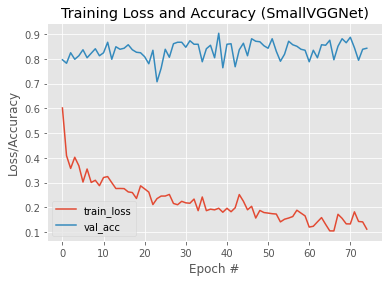

In [9]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(x=test_x, batch_size=32)
##print(classification_report(test_y.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
#plt.plot(N, H.history["val_loss"], label="val_loss")
#plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (SmallVGGNet)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()